Step 3 : 1-D Diffusion Equation
-----
***

The one-dimensional diffusion equation is:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

The first thing you should notice is that —unlike the previous two simple equations we have studied— this equation has a second-order derivative. We first need to learn what to do with it!

### Discretizing $\frac{\partial ^2 u}{\partial x^2}$

The second-order derivative can be represented geometrically as the line tangent to the curve given by the first derivative.  We will discretize the second-order derivative with a Central Difference scheme: a combination of Forward Difference and Backward Difference of the first derivative.  Consider the Taylor expansion of $u_{i+1}$ and $u_{i-1}$ around $u_i$:

$u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

$u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\bigg|_i + \frac{\Delta x^2}{2} \frac{\partial ^2 u}{\partial x^2}\bigg|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\bigg|_i + O(\Delta x^4)$

If we add these two expansions, you can see that the odd-numbered derivative terms will cancel each other out.  If we neglect any terms of $O(\Delta x^4)$ or higher (and really, those are very small), then we can rearrange the sum of these two expansions to solve for our second-derivative.  


$u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\bigg|_i + O(\Delta x^4)$

Then rearrange to solve for $\frac{\partial ^2 u}{\partial x^2}\bigg|_i$ and the result is:

$$\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + O(\Delta x^2)$$


We can now write the discretized version of the diffusion equation in 1D:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

As before, we notice that once we have an initial condition, the only unknown is $u_{i}^{n+1}$, so we re-arrange the equation solving for our unknown:

$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

The above discrete equation allows us to write a program to advance a solution in time. But we need an initial condition. Let's continue using our favorite: the hat function. So, at $t=0$, $u=2$ in the interval $0.5\le x\le 1$ and $u=1$ everywhere else. We are ready to number-crunch!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

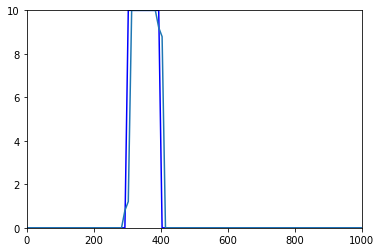

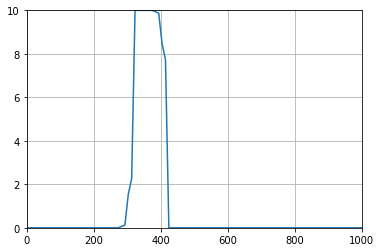

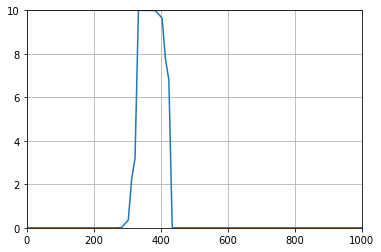

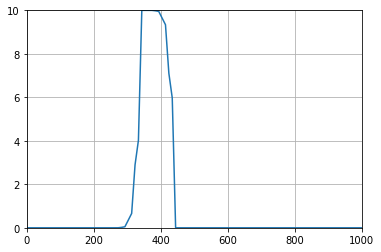

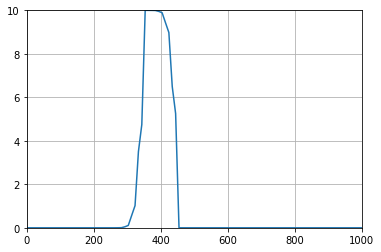

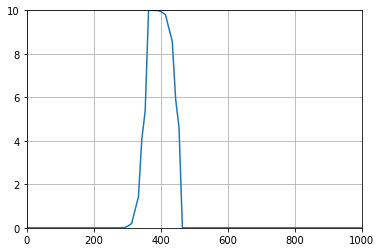

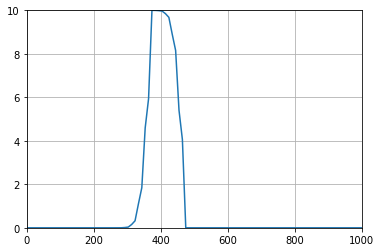

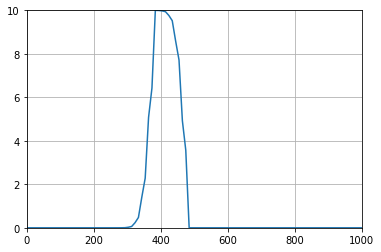

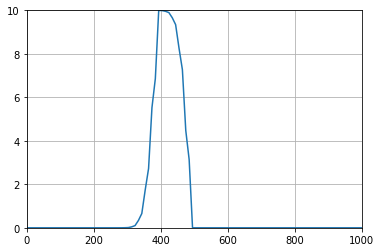

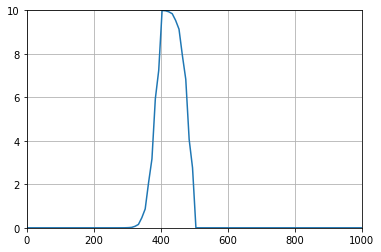

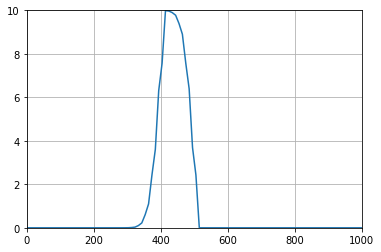

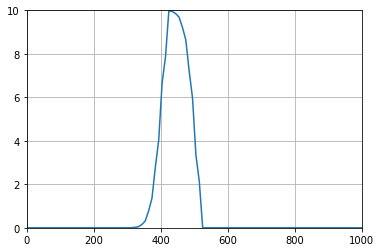

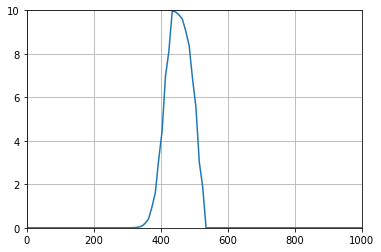

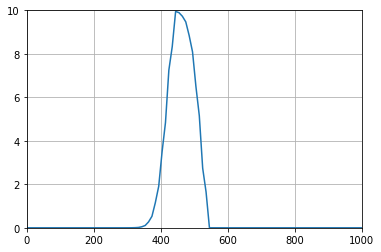

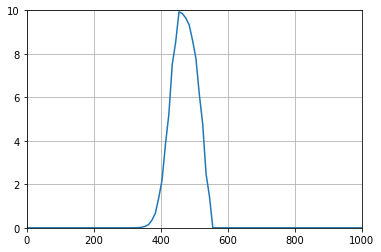

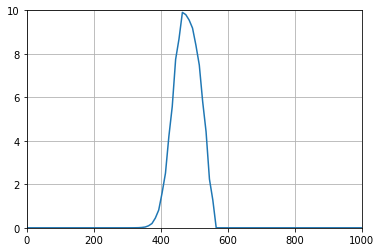

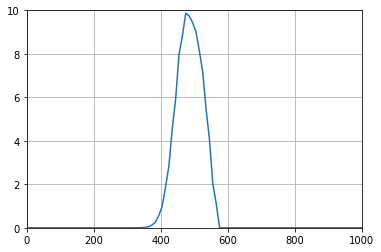

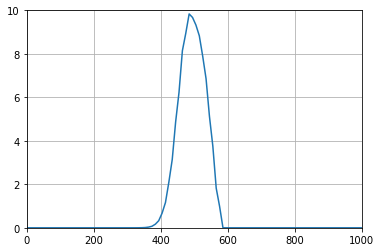

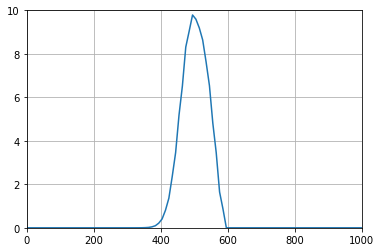

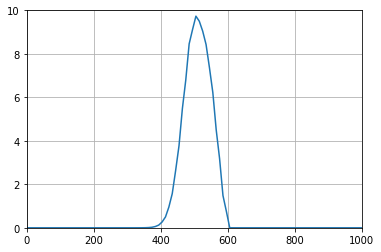

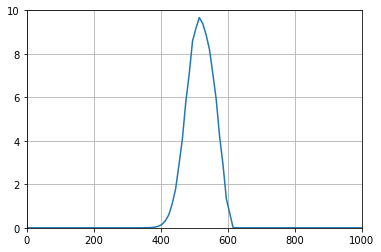

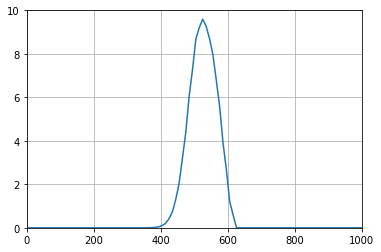

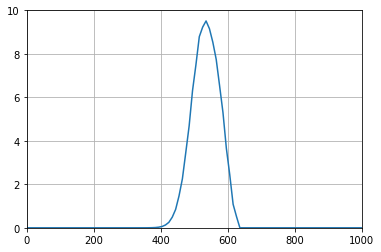

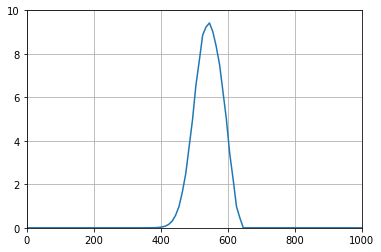

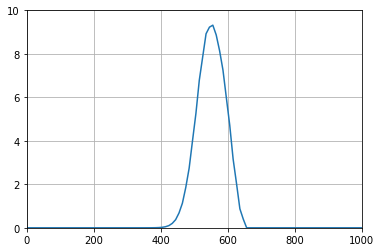

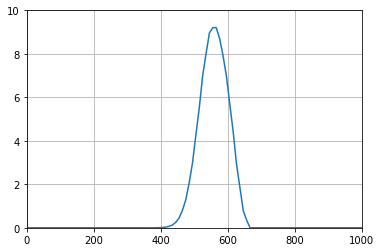

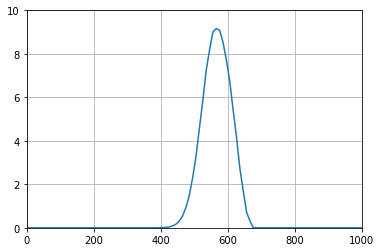

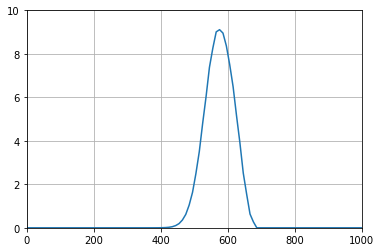

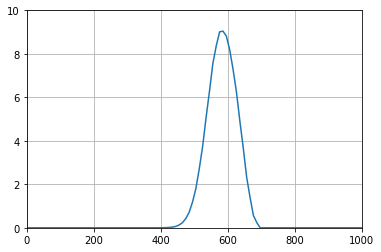

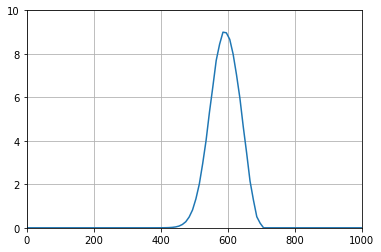

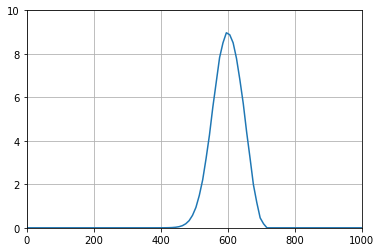

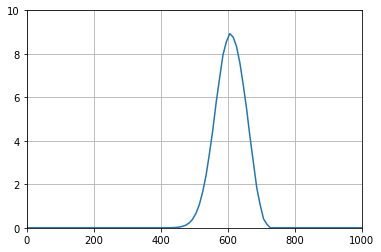

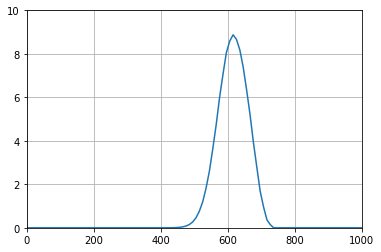

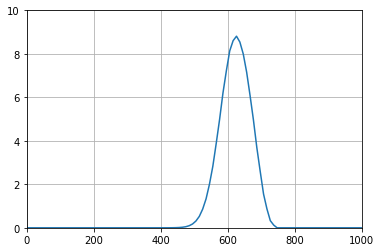

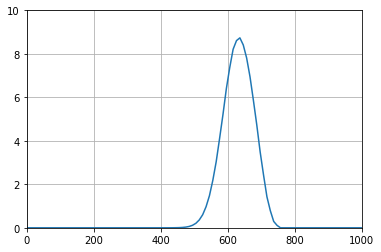

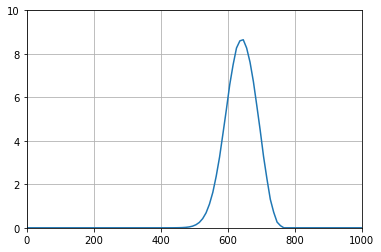

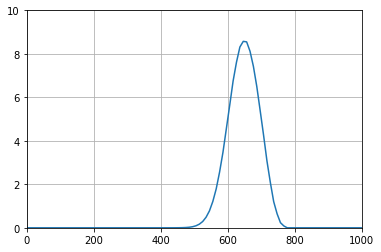

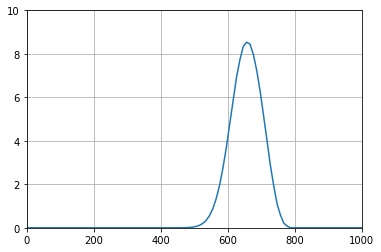

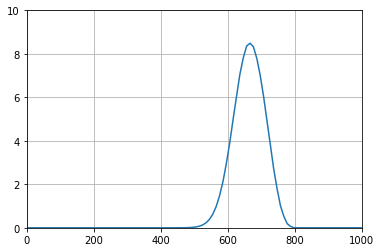

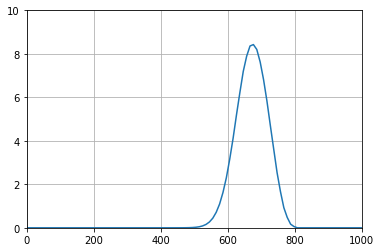

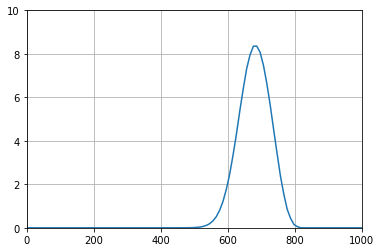

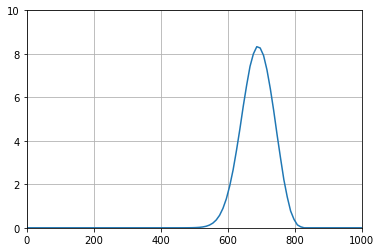

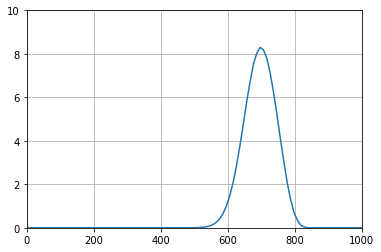

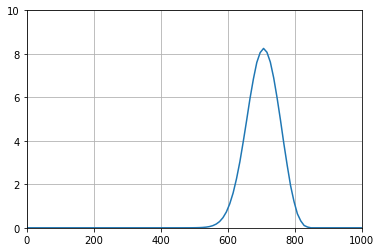

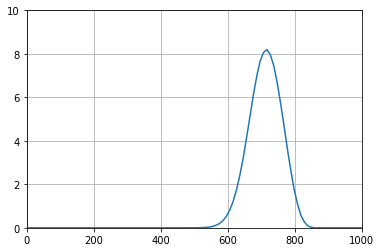

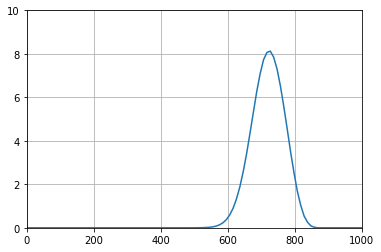

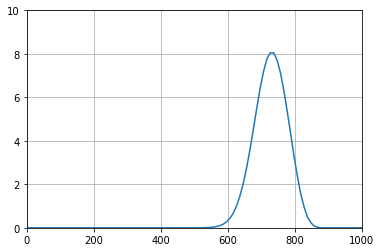

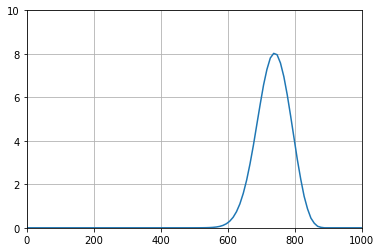

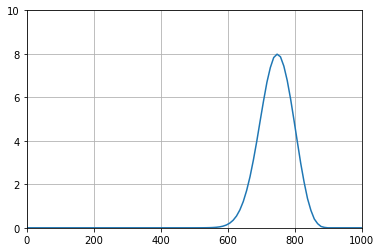

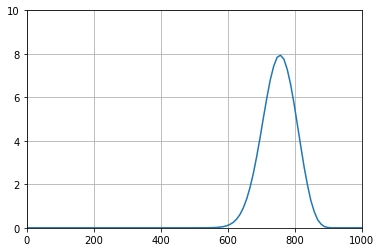

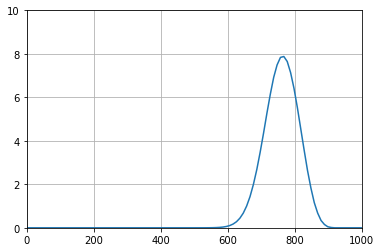

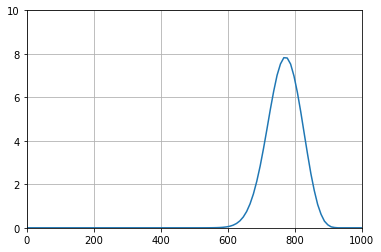

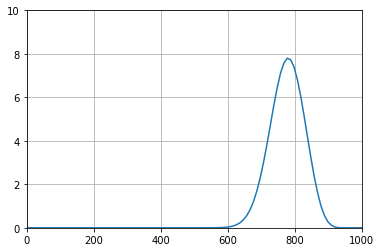

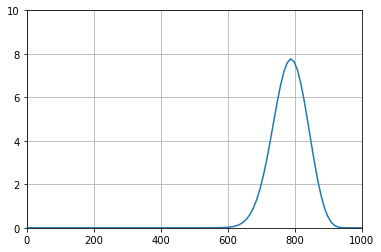

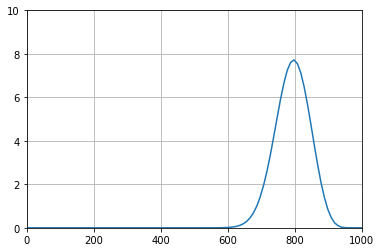

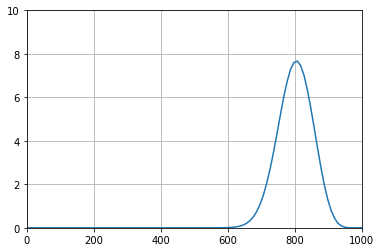

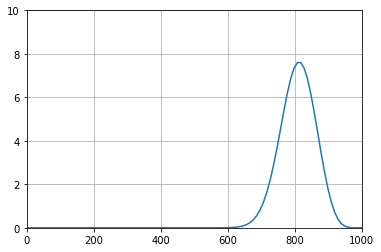

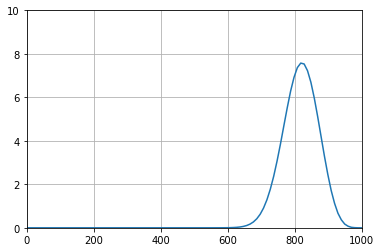

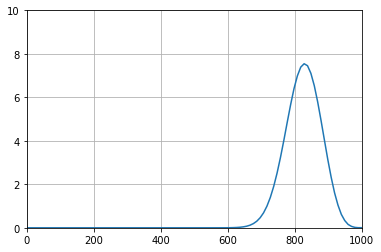

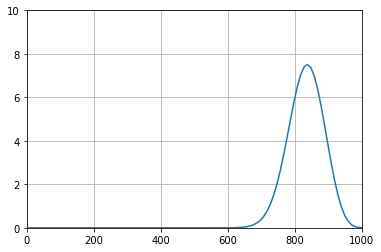

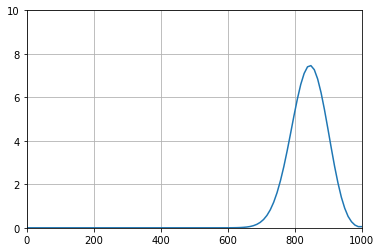

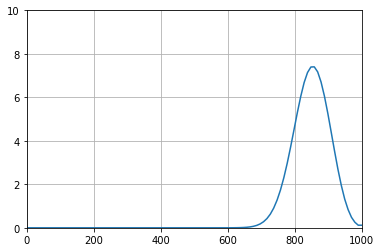

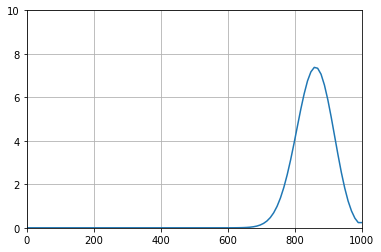

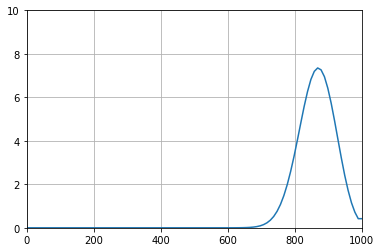

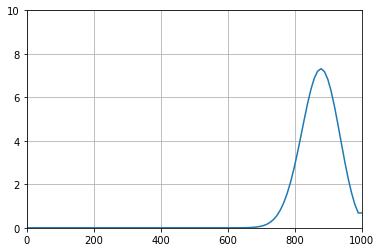

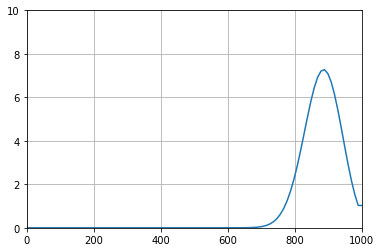

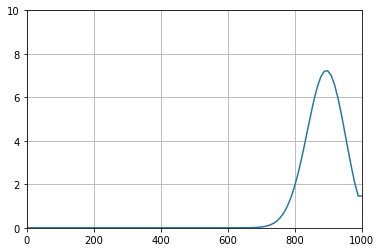

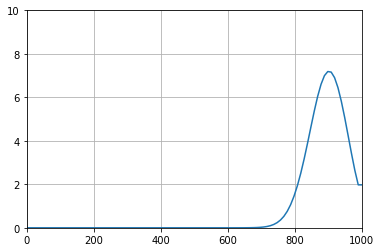

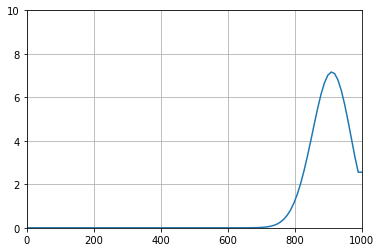

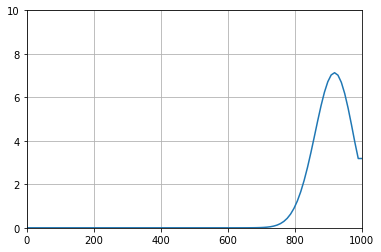

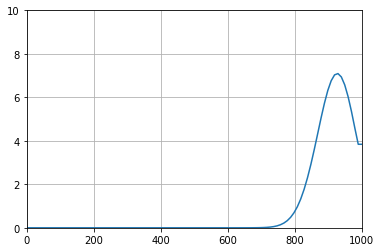

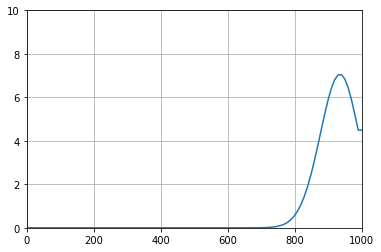

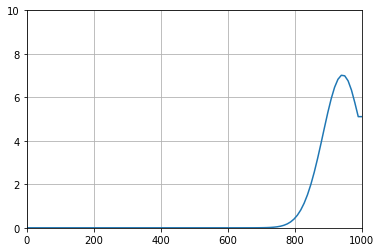

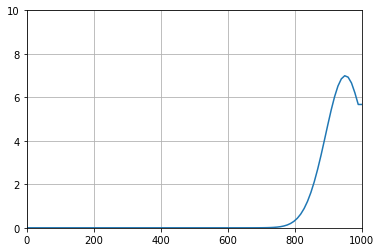

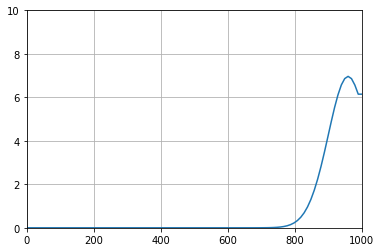

In [12]:

def f(x):
    if 300 <= x <= 400:
        return 10
    else:
        return 0

# Longueur du domaine
L = 1000
# Nombre de noeuds 
N = 100
# Le pas du maillage
dx = L/(N-1)
# Vitesse de transport
a = 1
# Coefficient de Diffusion
D = 1
# On se donne un nombre CFL tq (0 < CFL <=1)
CFL = 0.8
# Calcul du pas du temps de sorte à vérifier la condition de stabilité
# Ce pas du temps est el minimum des deux pas de temps qui assurent la
# stabilité des schémas pour la convection et la diffusion
dtconv = CFL*dx/abs(a)
dtdiff = CFL*dx**2/(2*D)
dt = min(dtconv,dtdiff)

# Position des noeuds et condition initiale
x = np.linspace(0,L,N)
Un = [f(i) for i in x]

# Tracée de la ciondition initiale
plt.plot(x,Un,'-b',label='Condition initiale')
plt.grid()

lamda = a*dt/dx
beta = dt*D/dx**2
Tfinal = 600
temps = 0
Unp1 = np.zeros(N)
while (temps < Tfinal):
    for i in range(1,N-1):
        Unp1[i] = Un[i] - lamda*(Un[i]-Un[i-1]) 
        Unp1[i] += beta*(Un[i-1]-2*Un[i]+Un[i+1])  

    # Conditions aux limites de Neumann (Dérivées nulles)
    Unp1[0] = Unp1[1]
    Unp1[N-1] = Unp1[N-2]
    # Tracée de la solution en fonction de x
    plt.plot(x,Unp1)
    plt.axis([0,1000,0,10])
    plt.grid()
    plt.pause(0.05)
    temps = temps + dt
    # Mise à jour de Un
    Un = Unp1
    Unp1 = np.zeros(N)